In [34]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sn # for heat map
import pandas as pd

In [128]:
# ideally, a independent variables should not 
# be correlated among themselves
# we're going to use the estimated multiple
# regression equation

# ŷ = b0 + b1x1 + b2x2 + ... bpxp

# BLUE lines are for correlation comparisons 
# between indepedendent variables

# RED are between DEPENDENT and INDEPENDENT

In [68]:
miles_traveled = np.asarray([89, 66, 78, 111, 44, 77, 80, 66, 109, 76])
num_deliveries = np.asarray([4, 1, 3, 6, 1, 3, 3, 2, 5, 3])
gas_price = np.asarray([3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 
            3.51, 3.45, 3.25])
travel_time = np.asarray([7, 5.4, 6.6, 7.4, 4.8, 6.4, 7,
                  5.6, 7.3, 6.4])

In [110]:
data = {
    "Miles travelled": miles_traveled,
    "Number of deliveries": num_deliveries,
    "Gas price": gas_price,
    "Travel time in hours": travel_time
}
df = pd.DataFrame(data, columns=["Miles travelled", 
                                 "Number of deliveries",
                                "Gas price",
                                "Travel time in hours"])

In [91]:
def plot_regression_line(independent_variable, dependent_variable, color):
    slope, intercept, r_value, p_value, std_err = stats.linregress(independent_variable, dependent_variable)
    
    # independent variable goes on the x axis
    plt.plot(independent_variable, dependent_variable, 'o', label="original",)
    plt.plot(independent_variable, intercept + slope * independent_variable, color, label="fitted")
    plt.legend()
    plt.show()

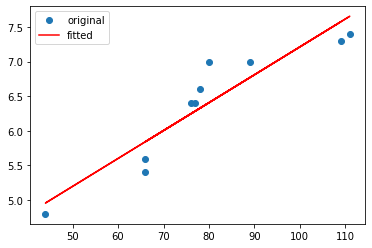

In [92]:
plot_regression_line(miles_traveled, travel_time, 'r')

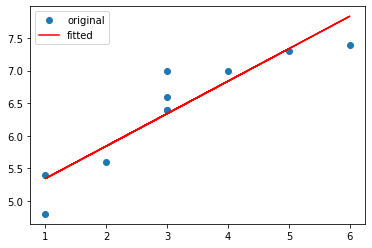

In [93]:
plot_regression_line(num_deliveries, travel_time, 'r')

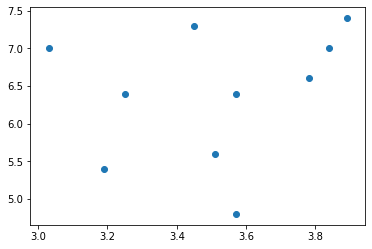

In [85]:
# apparently gas price no relationship 
# with our dependet variable
# thence, we will not use it for the
# regression analysis
plt.scatter(gas_price, travel_time)

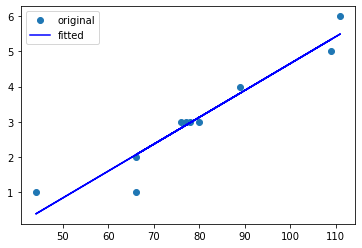

(0.9558982066200347, 1.5690314407660772e-05)

In [103]:
# now we're going to compare the correlation 
# between independent variables
plot_regression_line(miles_traveled, num_deliveries, 'b')
stats.pearsonr(miles_traveled, num_deliveries)

(0.3036671232649313, 0.3936684266008572)

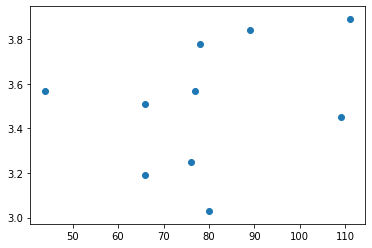

In [102]:
plt.scatter(miles_traveled, gas_price)
stats.pearsonr(miles_traveled,gas_price)
# no correlation here

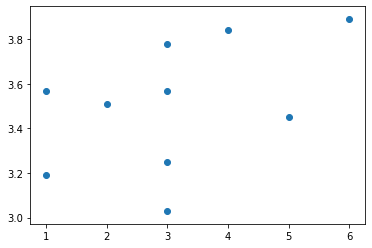

In [100]:
plt.scatter(num_deliveries, gas_price)
# no correlation here

In [105]:
stats.pearsonr(num_deliveries, gas_price)

(0.45556286548125463, 0.1857952728851274)

In [106]:
# using highly correlated independent variables in
# multiple regression would be *REDUNDANT*
# therefore we should remove one of them

In [111]:
print(df)

   Miles travelled  Number of deliveries  Gas price  Travel time in hours
0               89                     4       3.84                   7.0
1               66                     1       3.19                   5.4
2               78                     3       3.78                   6.6
3              111                     6       3.89                   7.4
4               44                     1       3.57                   4.8
5               77                     3       3.57                   6.4
6               80                     3       3.03                   7.0
7               66                     2       3.51                   5.6
8              109                     5       3.45                   7.3
9               76                     3       3.25                   6.4


In [112]:
corrMatrix = df.corr()

In [117]:
print(corrMatrix)

                      Miles travelled  Number of deliveries  Gas price  \
Miles travelled              1.000000              0.955898   0.303667   
Number of deliveries         0.955898              1.000000   0.455563   
Gas price                    0.303667              0.455563   1.000000   
Travel time in hours         0.928179              0.916443   0.229981   

                      Travel time in hours  
Miles travelled                   0.928179  
Number of deliveries              0.916443  
Gas price                         0.229981  
Travel time in hours              1.000000  


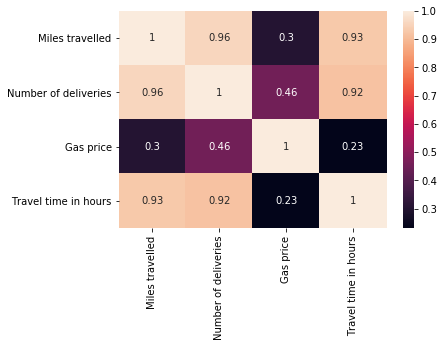

In [116]:
sn.heatmap(corrMatrix, annot=True)
plt.show()